In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [5]:
%matplotlib widget

In [6]:
folder = "../../Deidentified-Raw-Waveforms/"
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [7]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=8893124608, percent=29.7, used=3762647040, free=8893124608)

In [8]:
part = "1e"

In [9]:
# Load in the signal
print("Loading " + part + "; " + str(virtual_memory()[2])+" percent memory usage")
cols = coldict["raw_waves_data_"+part+".csv"]

df = pd.read_csv(folder + "raw_waves_data_"+part+".csv", usecols=cols)
times = df["time"]

signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)

# Delete the dataframe to save space
del df
collect_garbage()
print("Signal loaded in; " + str(virtual_memory()[2])+" percent memory usage")

# Make a copy of the raw signal for comparison purposes
raw_signal = signal.copy(deep=True)

# Get rid of spikes and troughs in the signal
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed; "+ str(virtual_memory()[2])+" percent memory usage")

Loading 1e; 29.8 percent memory usage
Signal loaded in; 41.2 percent memory usage
Troughs and spikes removed; 45.4 percent memory usage


In [10]:
# Load in the R peaks
print("Loading in R peak indices; " + str(virtual_memory()[2])+" percent memory usage")
df = pd.read_csv("try_again3/rpeaks_"+part+".csv")
df.columns = ["sample", "time"]
rpeaks = df["sample"]
del df
collect_garbage()
print("R peaks gathered; "+str(virtual_memory()[2])+" percent memory usage")


Loading in R peak indices; 45.4 percent memory usage
R peaks gathered; 45.6 percent memory usage


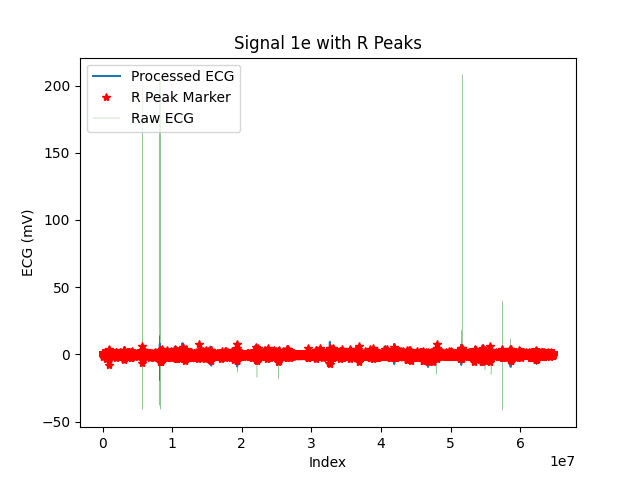

In [11]:
fig = wfdb.plot_items(signal=signal, ann_samp=[rpeaks], return_fig=True)
plt.title("Signal "+part+" with R Peaks")
plt.plot(raw_signal, color="green", linewidth=.15)
plt.xlabel("Index")
plt.ylabel("ECG (mV)")
plt.legend(["Processed ECG", "R Peak Marker", "Raw ECG"], loc="upper left")
plt.show()

In [12]:
virtual_memory()

svmem(total=12655771648, available=3770478592, percent=70.2, used=8885293056, free=3770478592)

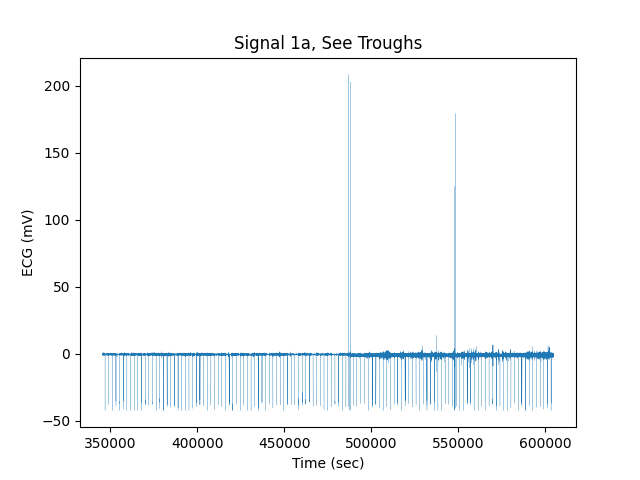

In [ ]:
fig = plt.figure()
plt.plot(times, raw_signal, linewidth=.15)
plt.xlabel("Time (sec)")
plt.ylabel("ECG (mV)")
plt.title("Signal 1a, See Troughs")
plt.show()